# Wine Quality Dataset Analysis
## CS14003 - Project 2: Decision Tree

**Dataset**: Wine Quality – Rượu vang trắng (White Wine)  
**Task**: Multi-class classification (Chất lượng: từ 3 đến 9)  
**Samples**: 4,898  
**Features**: 11 numerical chemical attributes (e.g., acidity, sugar, pH, alcohol)

---

### **THƯ VIỆN**

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

### **1) ĐỌC & XỬ LÝ DỮ LIỆU**

In [5]:
# Đọc file CSV
wine = pd.read_csv("../data/my_dataset.csv")

# Tách đặc trưng và nhãn
X = wine.drop(columns=['quality'])
y = wine['quality']


### **2) CHIA TẬP DỮ LIỆU THEO TỶ LỆ**

In [6]:
def get_stratified_splits(X, y, test_sizes):
    splits = {}
    for ratio in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=ratio, stratify=y, random_state=42)
        name = f"{int((1 - ratio) * 100)}/{int(ratio * 100)}"
        splits[name] = (X_train, X_test, y_train, y_test)
    return splits

splits = get_stratified_splits(X, y, test_sizes=[0.6, 0.4, 0.2, 0.1])


### **3) PHÂN BỐ NHÃN TRƯỚC & SAU KHI CHIA**

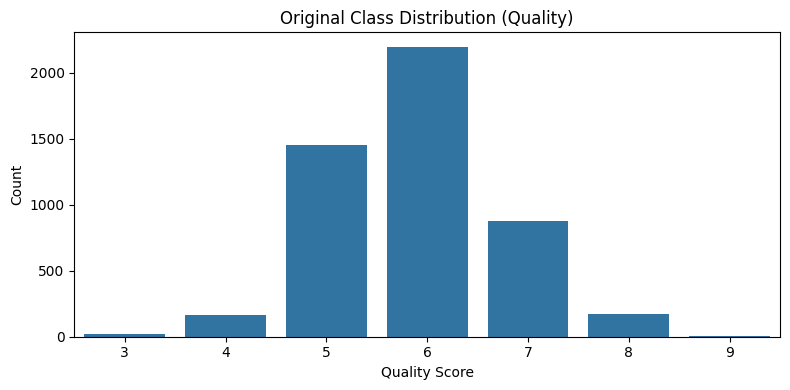

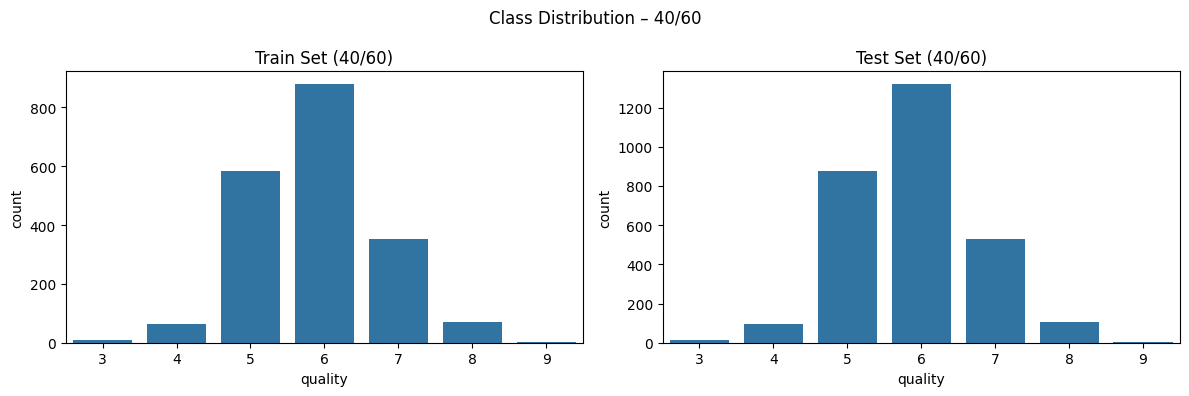

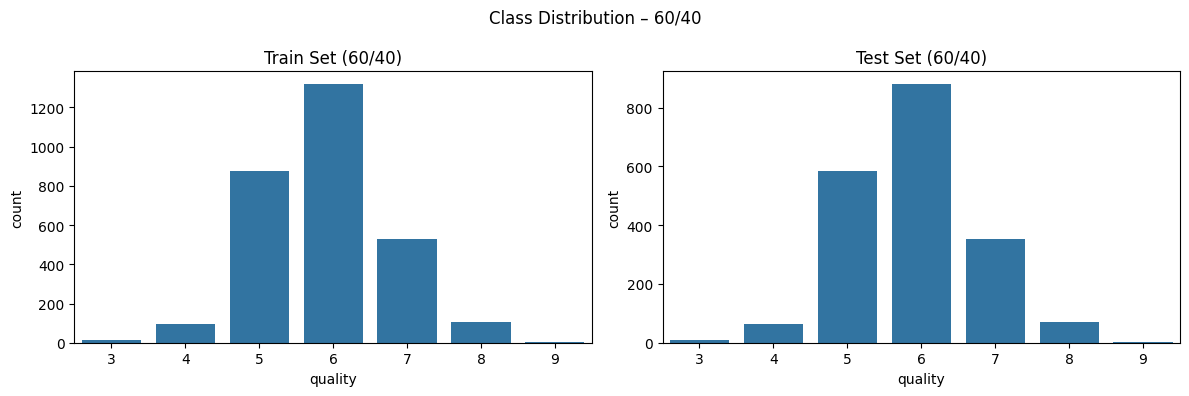

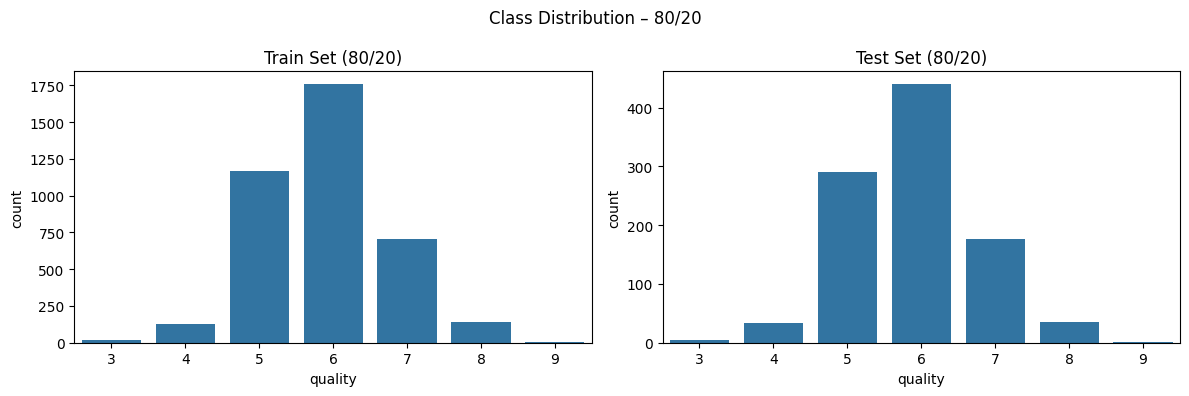

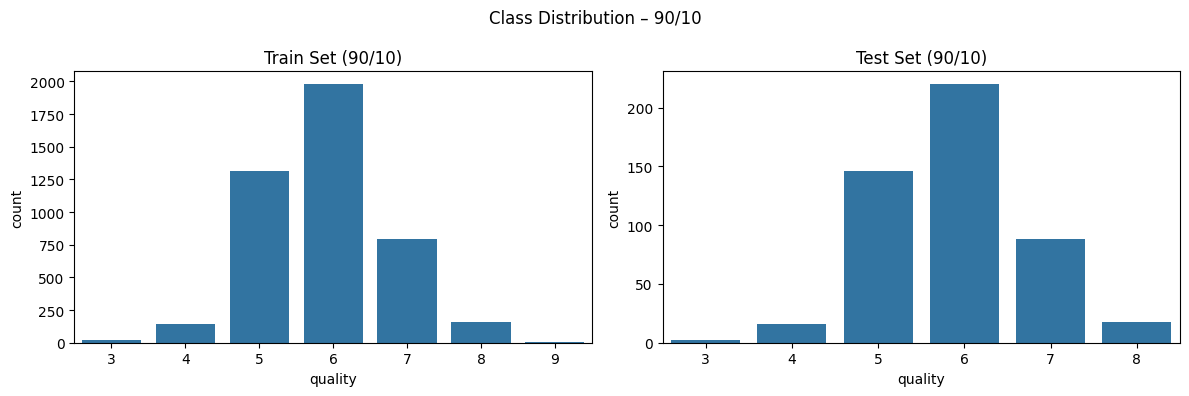

In [8]:
# Phân bố nhãn ban đầu
plt.figure(figsize=(8, 4))
sns.countplot(x=y)
plt.title("Original Class Distribution (Quality)")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
# Sau khi chia
for name, (X_train, X_test, y_train, y_test) in splits.items():
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.countplot(x=y_train, ax=ax[0])
    ax[0].set_title(f"Train Set ({name})")
    sns.countplot(x=y_test, ax=ax[1])
    ax[1].set_title(f"Test Set ({name})")
    plt.suptitle(f"Class Distribution – {name}")
    plt.tight_layout()
    plt.show()


### **4) HUẤN LUYỆN MÔ HÌNH VÀ VẼ CÂY QUYẾT ĐỊNH**
- #### _**Cây được vẽ với max_depth=3 cho dễ nhìn**_


=== Decision Tree Structure (40/60) ===
|--- alcohol <= 10.85
|   |--- volatile acidity <= 0.23
|   |   |--- alcohol <= 8.95
|   |   |   |--- class: 6
|   |   |--- alcohol >  8.95
|   |   |   |--- class: 6
|   |--- volatile acidity >  0.23
|   |   |--- pH <= 3.30
|   |   |   |--- class: 5
|   |   |--- pH >  3.30
|   |   |   |--- class: 6
|--- alcohol >  10.85
|   |--- alcohol <= 11.62
|   |   |--- volatile acidity <= 0.46
|   |   |   |--- class: 6
|   |   |--- volatile acidity >  0.46
|   |   |   |--- class: 4
|   |--- alcohol >  11.62
|   |   |--- free sulfur dioxide <= 10.50
|   |   |   |--- class: 6
|   |   |--- free sulfur dioxide >  10.50
|   |   |   |--- class: 7



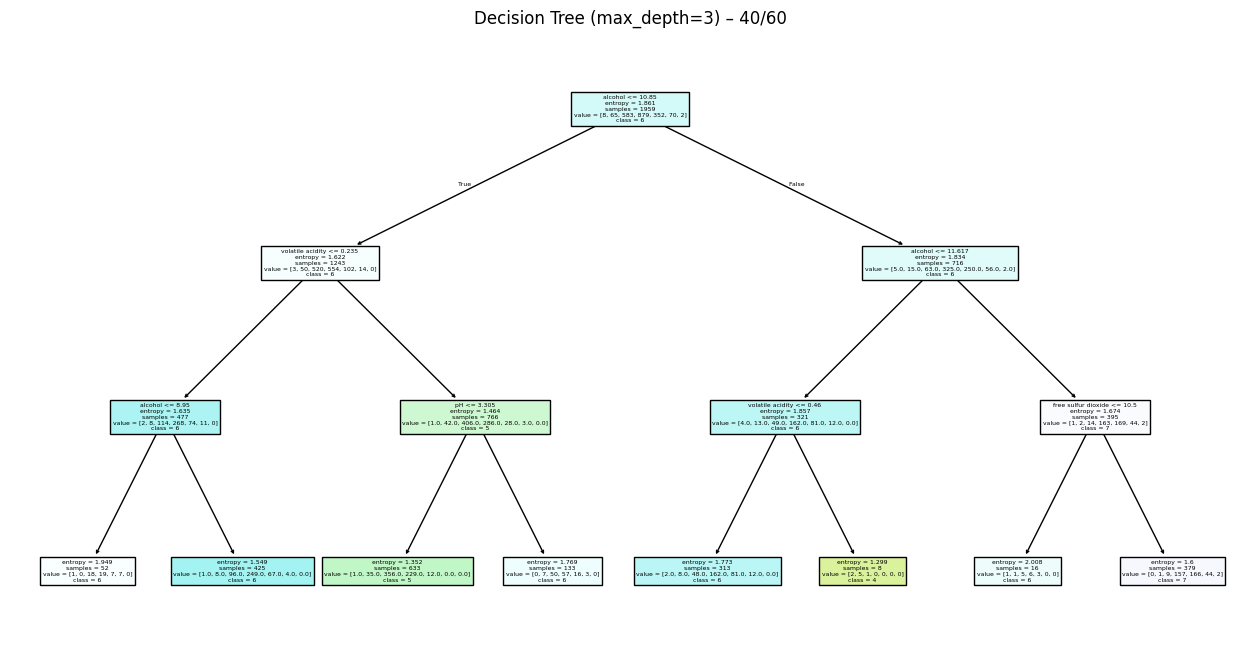


=== Decision Tree Structure (60/40) ===
|--- alcohol <= 10.85
|   |--- volatile acidity <= 0.23
|   |   |--- alcohol <= 8.85
|   |   |   |--- class: 5
|   |   |--- alcohol >  8.85
|   |   |   |--- class: 6
|   |--- volatile acidity >  0.23
|   |   |--- volatile acidity <= 0.30
|   |   |   |--- class: 6
|   |   |--- volatile acidity >  0.30
|   |   |   |--- class: 5
|--- alcohol >  10.85
|   |--- alcohol <= 12.08
|   |   |--- free sulfur dioxide <= 11.50
|   |   |   |--- class: 5
|   |   |--- free sulfur dioxide >  11.50
|   |   |   |--- class: 6
|   |--- alcohol >  12.08
|   |   |--- alcohol <= 12.78
|   |   |   |--- class: 6
|   |   |--- alcohol >  12.78
|   |   |   |--- class: 7



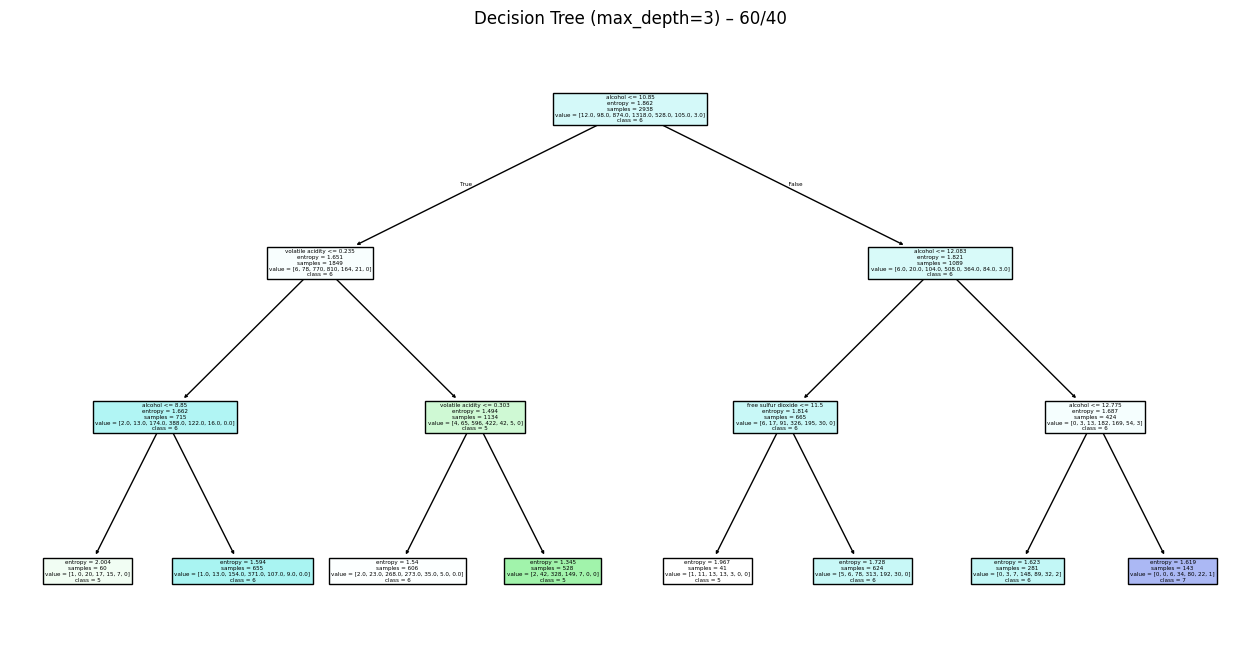


=== Decision Tree Structure (80/20) ===
|--- alcohol <= 10.85
|   |--- volatile acidity <= 0.27
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- class: 6
|   |   |--- volatile acidity >  0.21
|   |   |   |--- class: 6
|   |--- volatile acidity >  0.27
|   |   |--- alcohol <= 10.25
|   |   |   |--- class: 5
|   |   |--- alcohol >  10.25
|   |   |   |--- class: 6
|--- alcohol >  10.85
|   |--- free sulfur dioxide <= 11.50
|   |   |--- citric acid <= 0.24
|   |   |   |--- class: 4
|   |   |--- citric acid >  0.24
|   |   |   |--- class: 6
|   |--- free sulfur dioxide >  11.50
|   |   |--- alcohol <= 11.67
|   |   |   |--- class: 6
|   |   |--- alcohol >  11.67
|   |   |   |--- class: 6



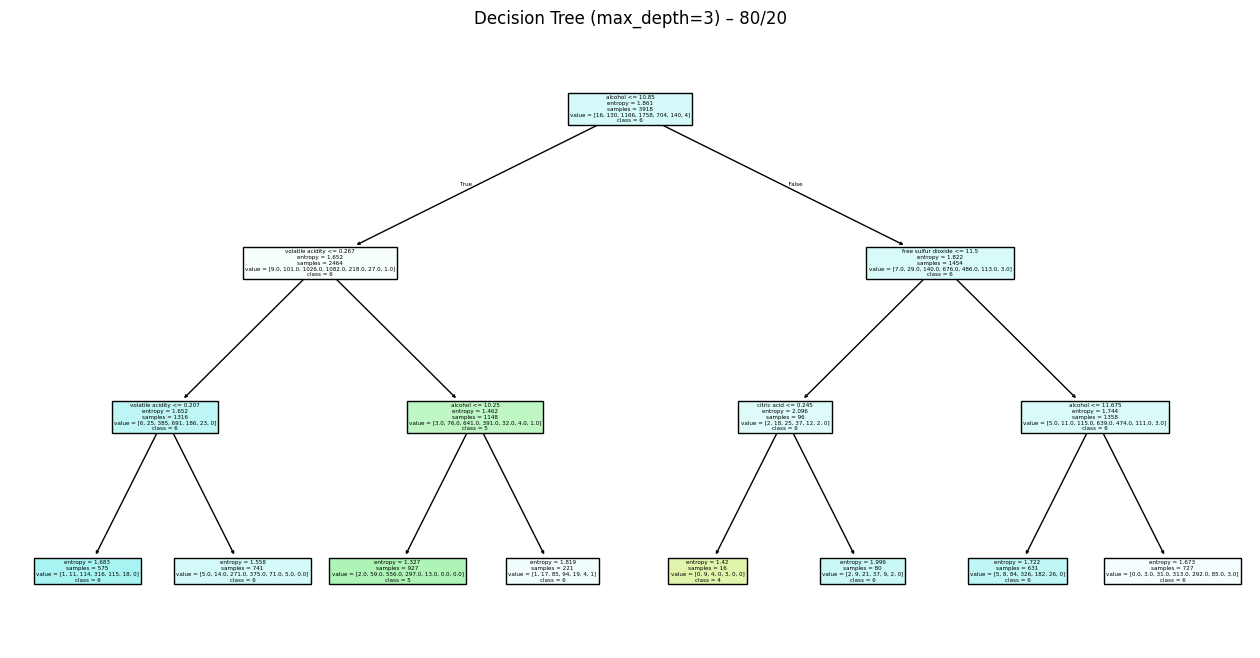


=== Decision Tree Structure (90/10) ===
|--- alcohol <= 10.85
|   |--- volatile acidity <= 0.27
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- class: 6
|   |   |--- volatile acidity >  0.21
|   |   |   |--- class: 6
|   |--- volatile acidity >  0.27
|   |   |--- alcohol <= 10.25
|   |   |   |--- class: 5
|   |   |--- alcohol >  10.25
|   |   |   |--- class: 6
|--- alcohol >  10.85
|   |--- free sulfur dioxide <= 11.50
|   |   |--- citric acid <= 0.24
|   |   |   |--- class: 4
|   |   |--- citric acid >  0.24
|   |   |   |--- class: 6
|   |--- free sulfur dioxide >  11.50
|   |   |--- alcohol <= 12.08
|   |   |   |--- class: 6
|   |   |--- alcohol >  12.08
|   |   |   |--- class: 6



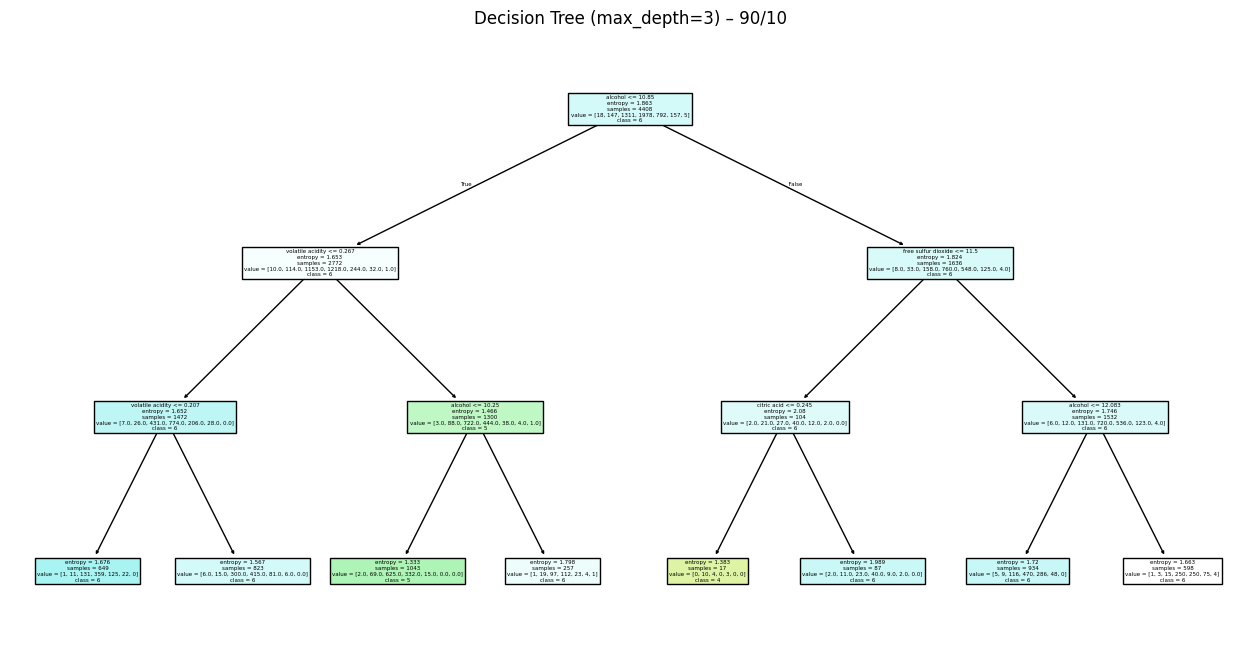

In [9]:
for name, (X_train, X_test, y_train, y_test) in splits.items():
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3)
    clf.fit(X_train, y_train)

    print(f"\n=== Decision Tree Structure ({name}) ===")
    print(export_text(clf, feature_names=list(X.columns)))

    plt.figure(figsize=(16, 8))
    plot_tree(clf, feature_names=X.columns, 
              class_names=[str(c) for c in sorted(y.unique())], filled=True)
    plt.title(f"Decision Tree (max_depth=3) – {name}")
    plt.show()


### **5) ĐÁNH GIÁ MÔ HÌNH**

=== 40/60 ===
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        12
           4       0.16      0.13      0.14        98
           5       0.57      0.52      0.55       874
           6       0.57      0.62      0.59      1319
           7       0.49      0.47      0.48       528
           8       0.32      0.33      0.33       105
           9       0.00      0.00      0.00         3

    accuracy                           0.53      2939
   macro avg       0.30      0.30      0.30      2939
weighted avg       0.53      0.53      0.53      2939



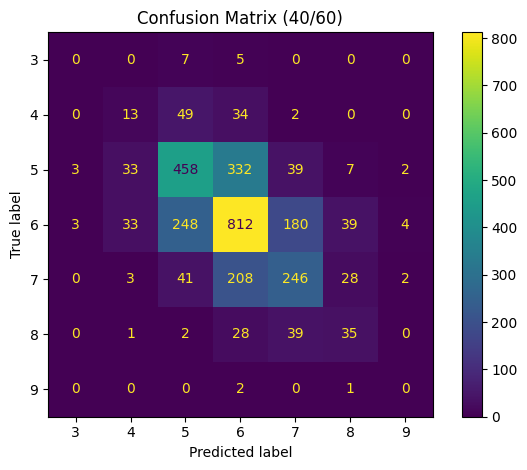

=== 60/40 ===
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.22      0.28      0.24        65
           5       0.60      0.56      0.58       583
           6       0.62      0.61      0.61       880
           7       0.52      0.55      0.54       352
           8       0.40      0.47      0.43        70
           9       0.00      0.00      0.00         2

    accuracy                           0.57      1960
   macro avg       0.34      0.35      0.34      1960
weighted avg       0.57      0.57      0.57      1960



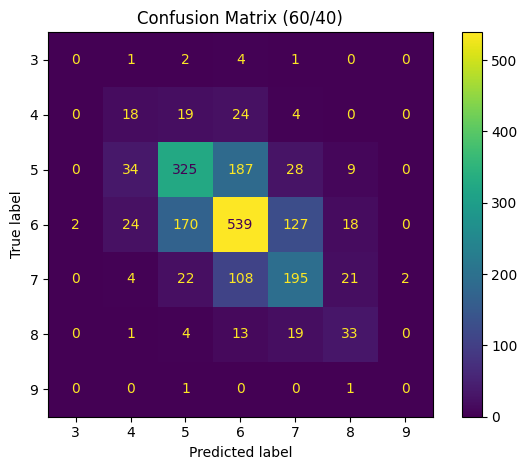

=== 80/20 ===
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.34      0.30      0.32        33
           5       0.65      0.63      0.64       291
           6       0.66      0.67      0.66       440
           7       0.55      0.55      0.55       176
           8       0.48      0.66      0.55        35
           9       0.00      0.00      0.00         1

    accuracy                           0.62       980
   macro avg       0.38      0.40      0.39       980
weighted avg       0.62      0.62      0.62       980



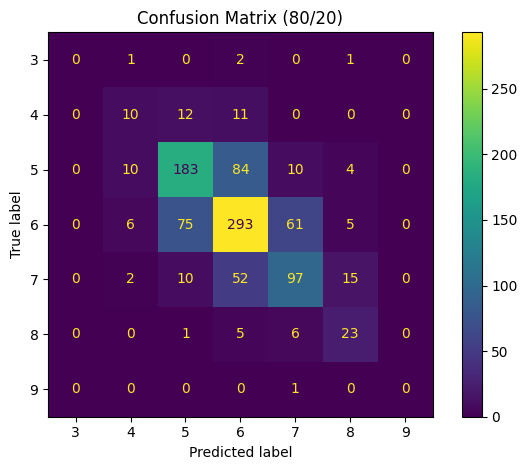

=== 90/10 ===
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.25      0.33        16
           5       0.58      0.64      0.61       146
           6       0.65      0.62      0.64       220
           7       0.59      0.59      0.59        88
           8       0.67      0.78      0.72        18

    accuracy                           0.61       490
   macro avg       0.50      0.48      0.48       490
weighted avg       0.61      0.61      0.61       490



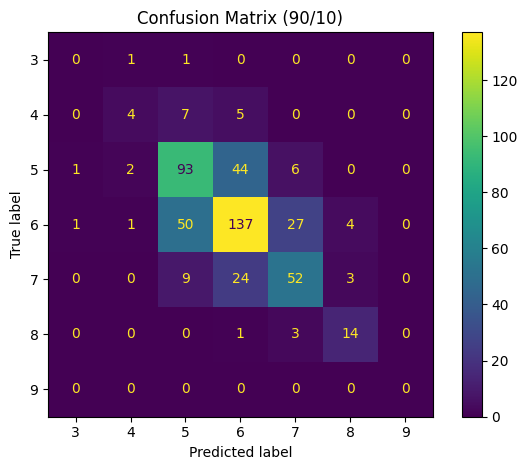

In [10]:
for name, (X_train, X_test, y_train, y_test) in splits.items():
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred, zero_division=0))

    cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
    disp.plot()
    plt.grid(False)  
    plt.title(f"Confusion Matrix ({name})")
    plt.tight_layout()
    plt.show()


### **6) PHÂN TÍCH ẢNH HƯỞNG CỦA MAX_DEPTH( TỈ LỆ 80/20)**


=== Tree Summary (max_depth=None) ===
|--- alcohol <= 10.85
|   |--- volatile acidity <= 0.27
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- residual sugar <= 10.15
|   |   |   |   |--- sulphates <= 0.53
|   |   |   |   |   |--- fixed acidity <= 7.85
|   |   |   |   |   |   |--- free sulfur dioxide <= 14.50
|   |   |   |   |   |   |   |--- residual sugar <= 3.65
|   |   |   |   |   |   |   |   |--- pH <= 3.08
|   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |--- pH >  3.08
|   |   |   |   |   |   |   |   |   |--- chlorides <= 0.15
|   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |   |--- chlorides >  0.15
|   |   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |--- residual sugar >  3.65
|   |   |   |   |   |   |   |   |--- residual sugar <= 4.70
|   |   |   |   |   |   |   |   |   |--- class: 8
|   |   |   |   |   |   |   |   |--- residual sugar >  4.70
|   |   |   |   |   |   |   

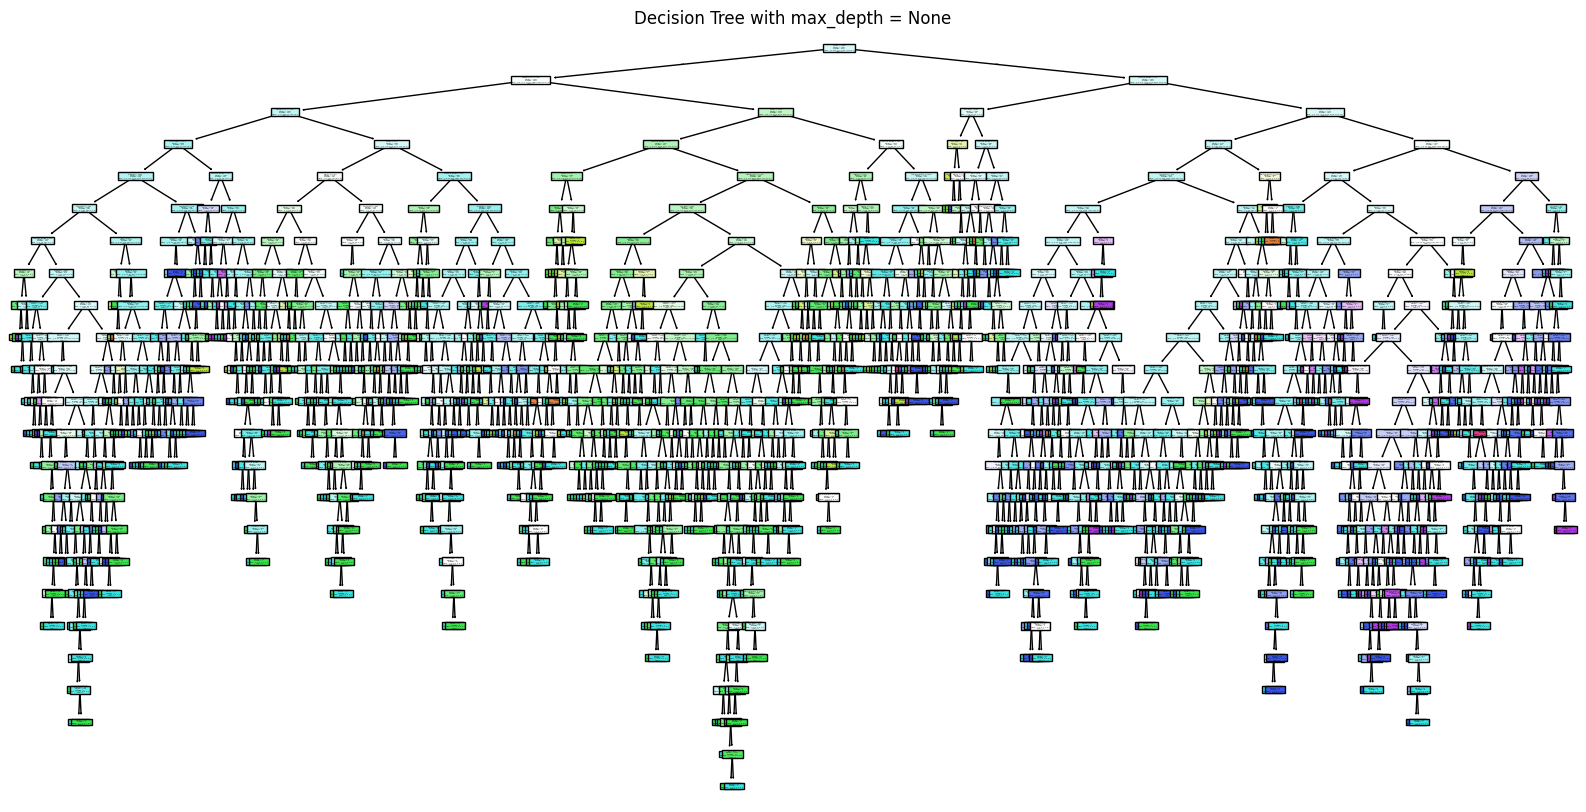


=== Tree Summary (max_depth=2) ===
|--- alcohol <= 10.85
|   |--- volatile acidity <= 0.27
|   |   |--- class: 6
|   |--- volatile acidity >  0.27
|   |   |--- class: 5
|--- alcohol >  10.85
|   |--- free sulfur dioxide <= 11.50
|   |   |--- class: 6
|   |--- free sulfur dioxide >  11.50
|   |   |--- class: 6



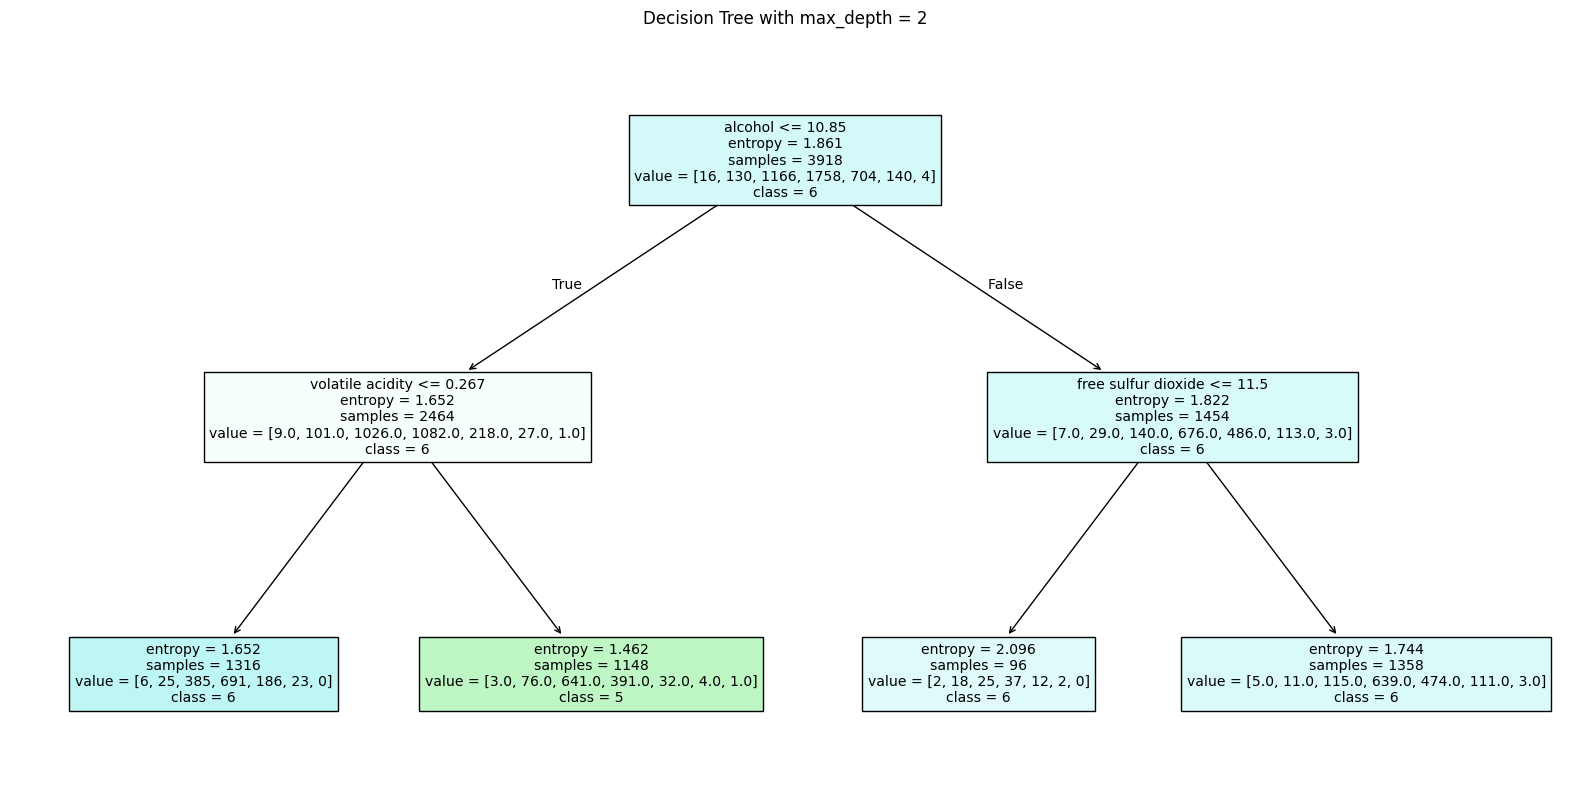


=== Tree Summary (max_depth=3) ===
|--- alcohol <= 10.85
|   |--- volatile acidity <= 0.27
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- class: 6
|   |   |--- volatile acidity >  0.21
|   |   |   |--- class: 6
|   |--- volatile acidity >  0.27
|   |   |--- alcohol <= 10.25
|   |   |   |--- class: 5
|   |   |--- alcohol >  10.25
|   |   |   |--- class: 6
|--- alcohol >  10.85
|   |--- free sulfur dioxide <= 11.50
|   |   |--- citric acid <= 0.24
|   |   |   |--- class: 4
|   |   |--- citric acid >  0.24
|   |   |   |--- class: 6
|   |--- free sulfur dioxide >  11.50
|   |   |--- alcohol <= 11.67
|   |   |   |--- class: 6
|   |   |--- alcohol >  11.67
|   |   |   |--- class: 6



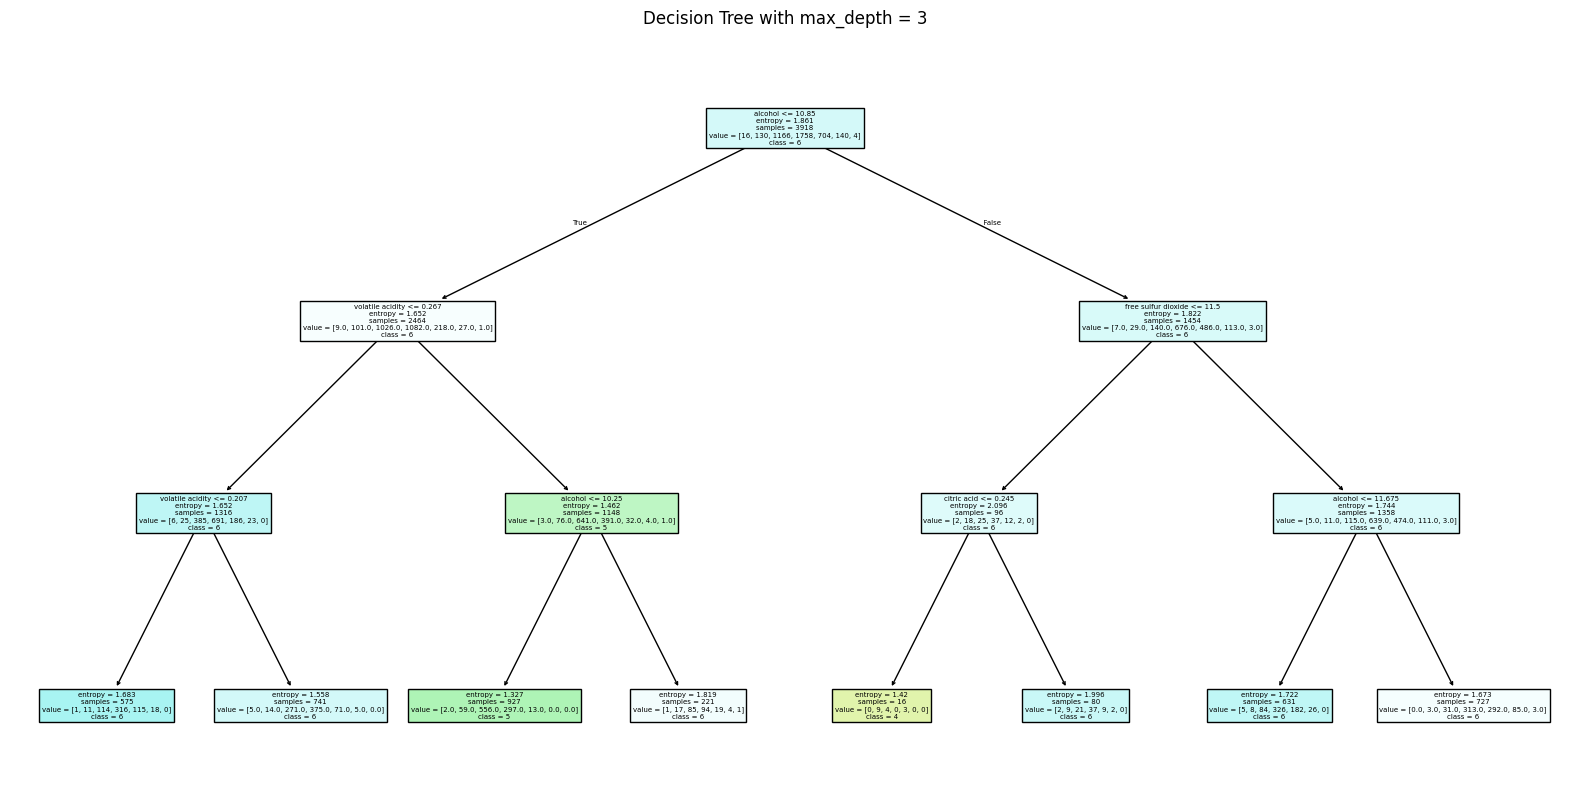


=== Tree Summary (max_depth=4) ===
|--- alcohol <= 10.85
|   |--- volatile acidity <= 0.27
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- residual sugar <= 10.15
|   |   |   |   |--- class: 6
|   |   |   |--- residual sugar >  10.15
|   |   |   |   |--- class: 6
|   |   |--- volatile acidity >  0.21
|   |   |   |--- alcohol <= 9.85
|   |   |   |   |--- class: 5
|   |   |   |--- alcohol >  9.85
|   |   |   |   |--- class: 6
|   |--- volatile acidity >  0.27
|   |   |--- alcohol <= 10.25
|   |   |   |--- free sulfur dioxide <= 13.50
|   |   |   |   |--- class: 5
|   |   |   |--- free sulfur dioxide >  13.50
|   |   |   |   |--- class: 5
|   |   |--- alcohol >  10.25
|   |   |   |--- free sulfur dioxide <= 20.50
|   |   |   |   |--- class: 5
|   |   |   |--- free sulfur dioxide >  20.50
|   |   |   |   |--- class: 6
|--- alcohol >  10.85
|   |--- free sulfur dioxide <= 11.50
|   |   |--- citric acid <= 0.24
|   |   |   |--- citric acid <= 0.20
|   |   |   |   |--- class: 4
|   | 

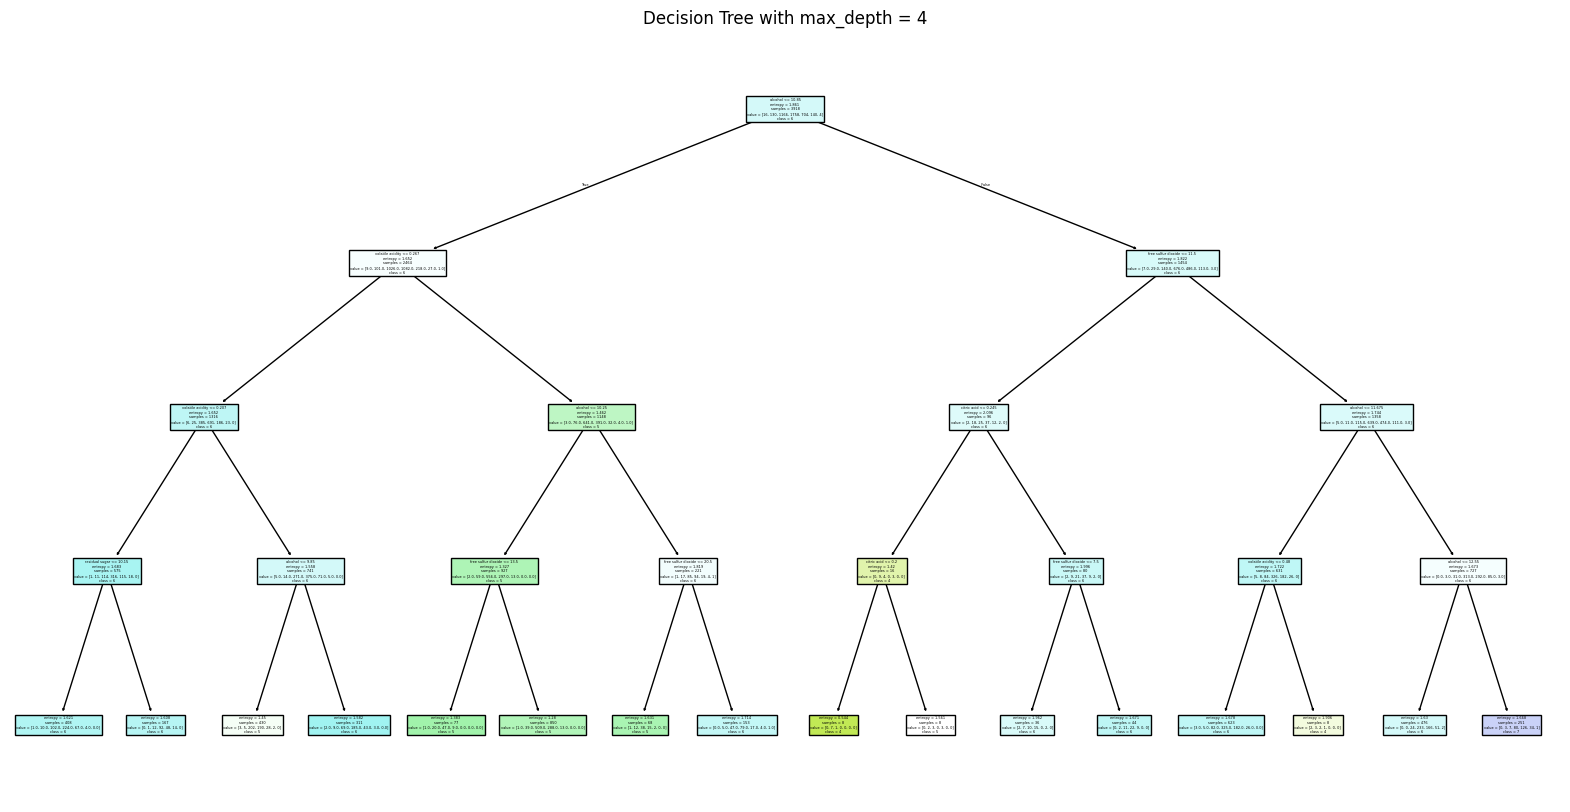


=== Tree Summary (max_depth=5) ===
|--- alcohol <= 10.85
|   |--- volatile acidity <= 0.27
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- residual sugar <= 10.15
|   |   |   |   |--- sulphates <= 0.53
|   |   |   |   |   |--- class: 6
|   |   |   |   |--- sulphates >  0.53
|   |   |   |   |   |--- class: 6
|   |   |   |--- residual sugar >  10.15
|   |   |   |   |--- free sulfur dioxide <= 33.50
|   |   |   |   |   |--- class: 7
|   |   |   |   |--- free sulfur dioxide >  33.50
|   |   |   |   |   |--- class: 6
|   |   |--- volatile acidity >  0.21
|   |   |   |--- alcohol <= 9.85
|   |   |   |   |--- density <= 1.00
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- density >  1.00
|   |   |   |   |   |--- class: 6
|   |   |   |--- alcohol >  9.85
|   |   |   |   |--- free sulfur dioxide <= 14.50
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- free sulfur dioxide >  14.50
|   |   |   |   |   |--- class: 6
|   |--- volatile acidity >  0.27
|   |   |--- alcohol <= 10

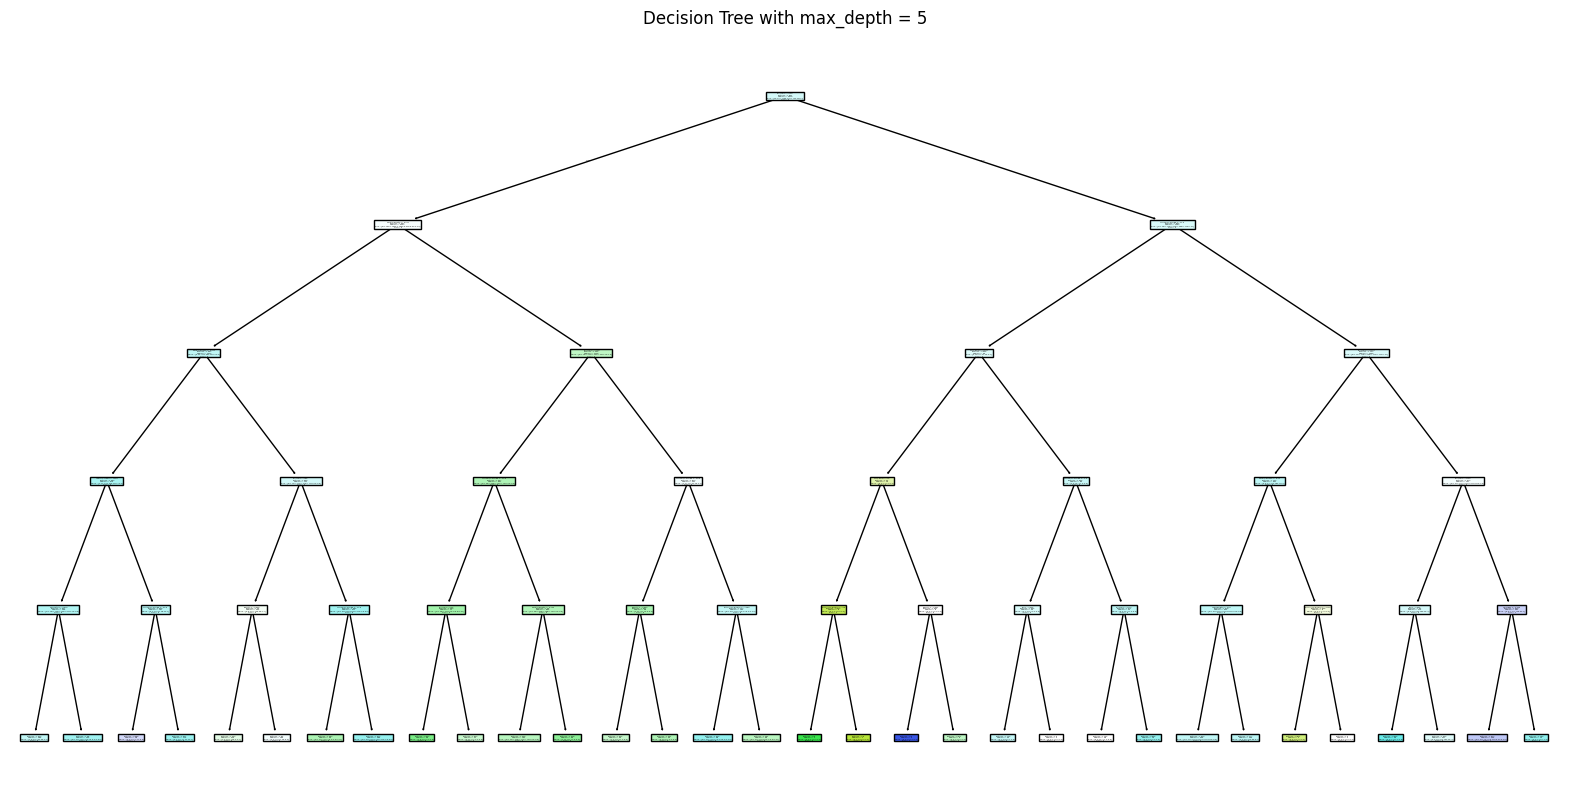


=== Tree Summary (max_depth=6) ===
|--- alcohol <= 10.85
|   |--- volatile acidity <= 0.27
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- residual sugar <= 10.15
|   |   |   |   |--- sulphates <= 0.53
|   |   |   |   |   |--- fixed acidity <= 7.85
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- fixed acidity >  7.85
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |--- sulphates >  0.53
|   |   |   |   |   |--- fixed acidity <= 7.45
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- fixed acidity >  7.45
|   |   |   |   |   |   |--- class: 6
|   |   |   |--- residual sugar >  10.15
|   |   |   |   |--- free sulfur dioxide <= 33.50
|   |   |   |   |   |--- alcohol <= 9.10
|   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |--- alcohol >  9.10
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |--- free sulfur dioxide >  33.50
|   |   |   |   |   |--- alcohol <= 8.95
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- alcohol 

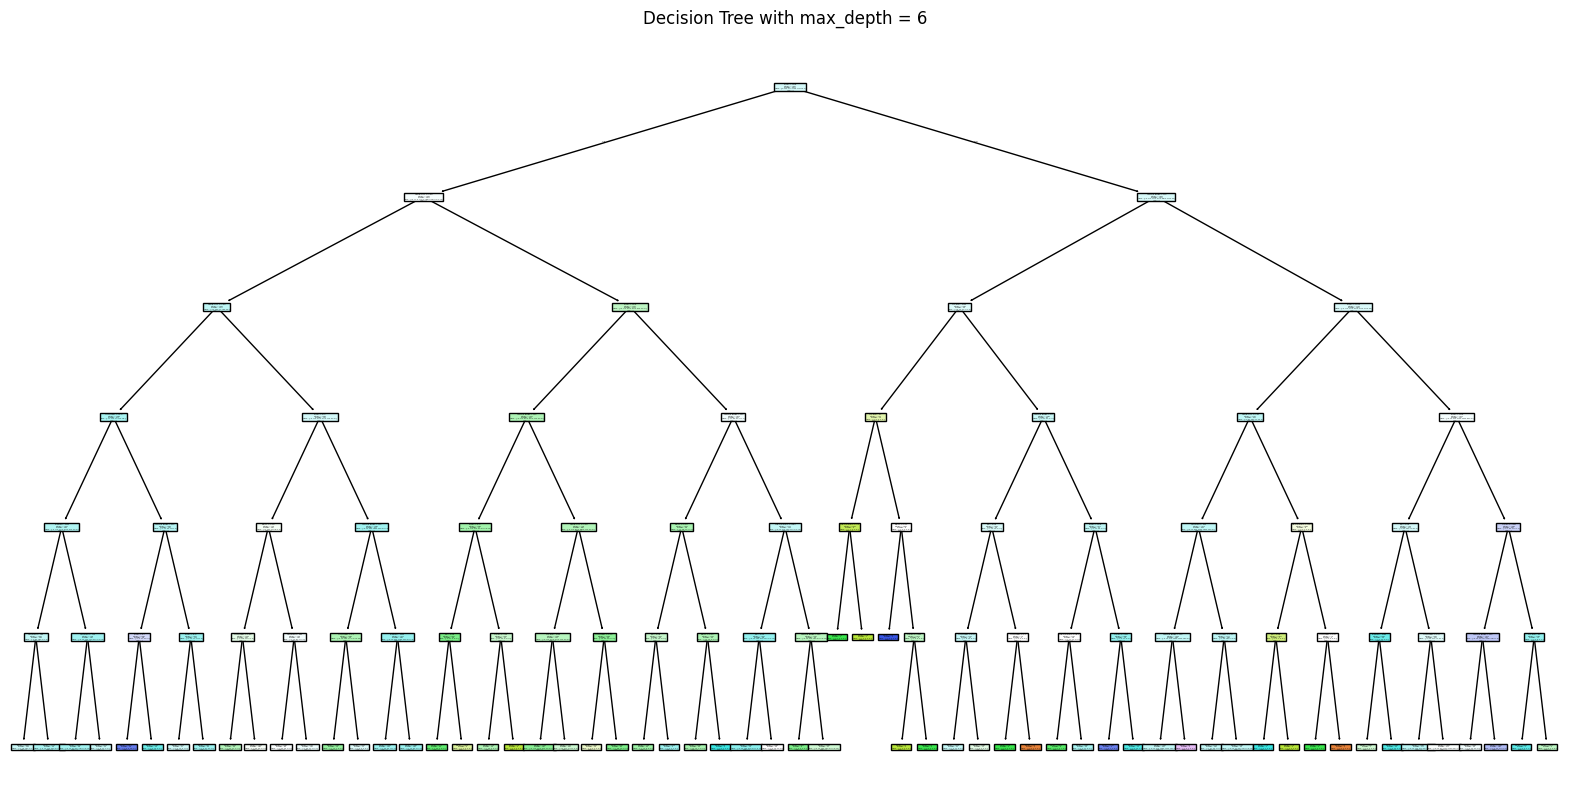


=== Tree Summary (max_depth=7) ===
|--- alcohol <= 10.85
|   |--- volatile acidity <= 0.27
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- residual sugar <= 10.15
|   |   |   |   |--- sulphates <= 0.53
|   |   |   |   |   |--- fixed acidity <= 7.85
|   |   |   |   |   |   |--- free sulfur dioxide <= 14.50
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- free sulfur dioxide >  14.50
|   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- fixed acidity >  7.85
|   |   |   |   |   |   |--- pH <= 2.90
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- pH >  2.90
|   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |--- sulphates >  0.53
|   |   |   |   |   |--- fixed acidity <= 7.45
|   |   |   |   |   |   |--- sulphates <= 0.83
|   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |--- sulphates >  0.83
|   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |--- fixed acidity >  7.45
|   |   |   |   |   |

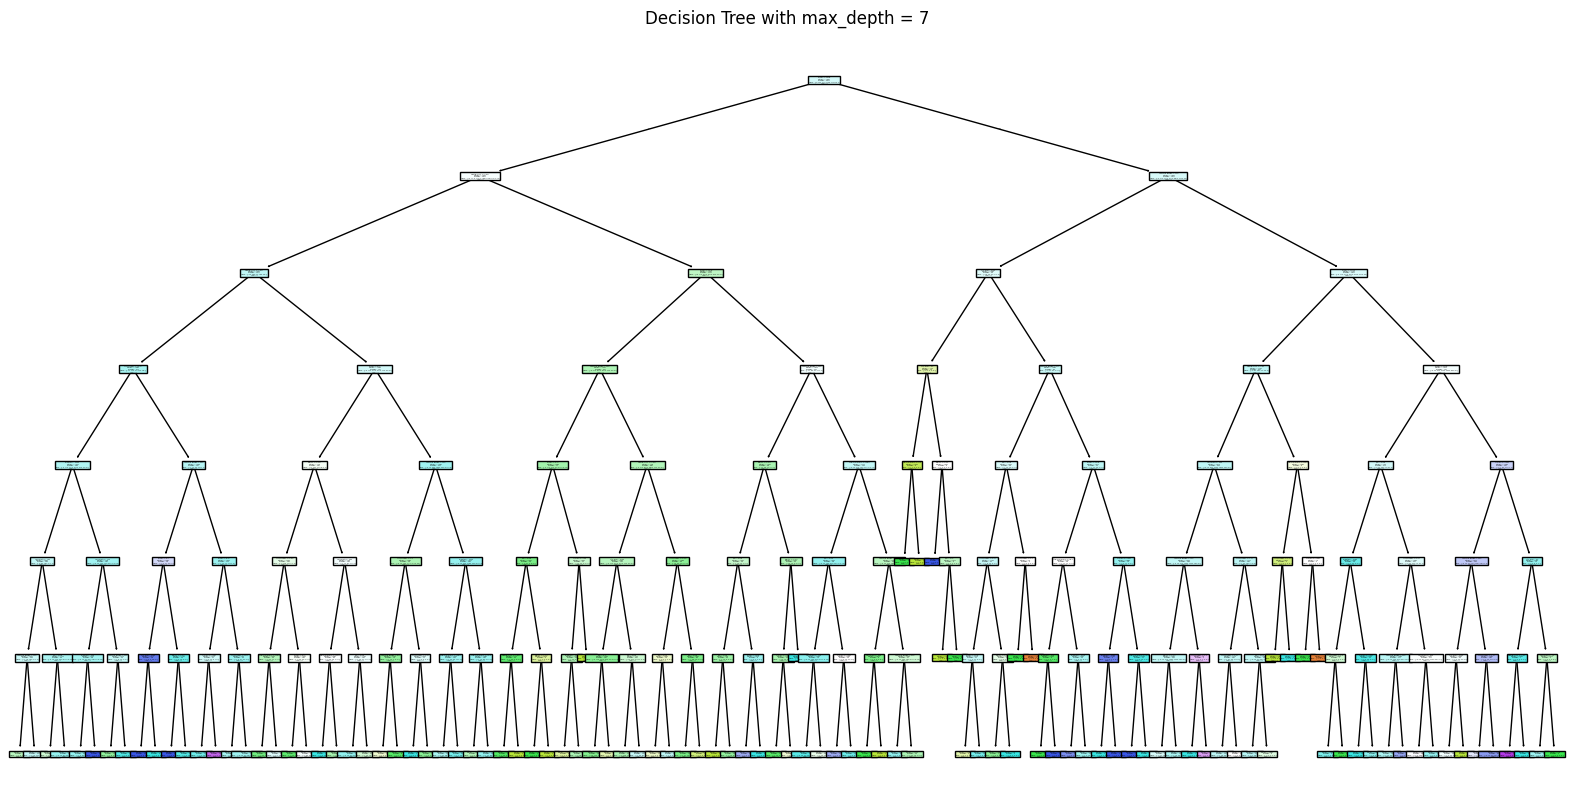


Depth vs Accuracy (80/20 split)
max_depth = None: accuracy = 0.6184
max_depth = 2: accuracy = 0.5092
max_depth = 3: accuracy = 0.5255
max_depth = 4: accuracy = 0.5306
max_depth = 5: accuracy = 0.5398
max_depth = 6: accuracy = 0.5367
max_depth = 7: accuracy = 0.5347


In [13]:
X_train, X_test, y_train, y_test = splits['80/20']
depths = [None, 2, 3, 4, 5, 6, 7]
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"\n=== Tree Summary (max_depth={depth}) ===")
    print(export_text(clf, feature_names=list(X.columns)))

    plt.figure(figsize=(20, 10))
    plot_tree(clf, feature_names=X.columns, class_names=[str(c) for c in sorted(y.unique())], filled=True)
    plt.title(f"Decision Tree with max_depth = {depth}")
    plt.show()

print("\nDepth vs Accuracy (80/20 split)")
for d, acc in zip(depths, accuracies):
    print(f"max_depth = {d}: accuracy = {acc:.4f}")



- #### **Biểu đồ ảnh hưởng của độ sâu cây**

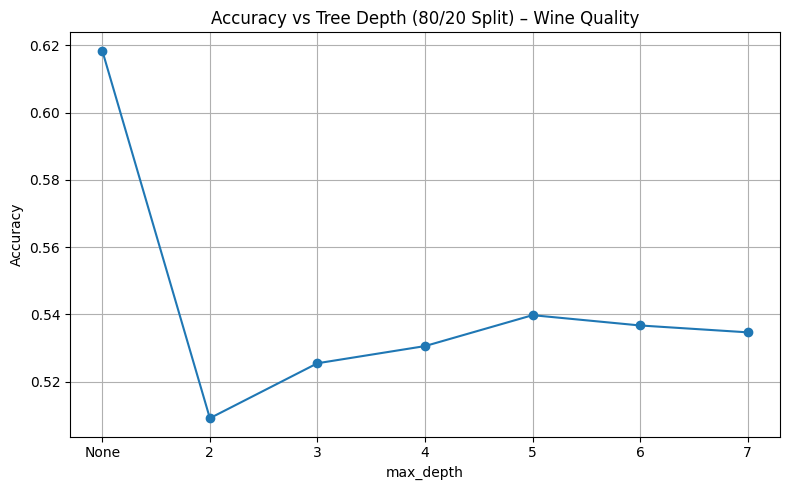


Max Accuracy (80/20 split): 0.6184


In [12]:

plt.figure(figsize=(8, 5))
plt.plot(["None" if d is None else d for d in depths], accuracies, marker='o')
plt.title("Accuracy vs Tree Depth (80/20 Split) – Wine Quality")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

max_acc = max(accuracies)
print(f"\nMax Accuracy (80/20 split): {max_acc:.4f}")